### Scraping the data from the English Premier League (EPL) Football Matches
The first thing we will need to do is to figure out how to download the HTML version of a page that shows the data we want to collect in the EPL. This will require a library called `requests` in Python!

In [1]:
import requests

In [2]:
# Now that we have the requests library, we can define the URL that will be used.
standings_url = "https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats"
data = requests.get(standings_url) # We can then download the HTML content into a new variable and analyze it.


In [3]:
data.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202508071" />\n<script>\n/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */\n  window.dataLayer = window.dataLayer ||[];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'consent\',\'default\',{\n        \'ad_storage\':\'denied\',\n        \'analytics_storage\':\'denied\',\n        \'ad_user_data\':\'denied\',\n        \'ad_personalization\':\'denied\',\n        \'personalization_storage\':\'denied\',\n        \'functionality_storage\':\'granted\',\n        \'security_storage\':\'granted\',\n        \'wait_for_update\': 500\n      });\n      gtag("set", "ads_data_redaction", true);\

Above, we can see that now the HTML information about the website is now being stored in the `data` variable. It can be difficult to read, so we will first look into the link to decide what we want to do with the link.

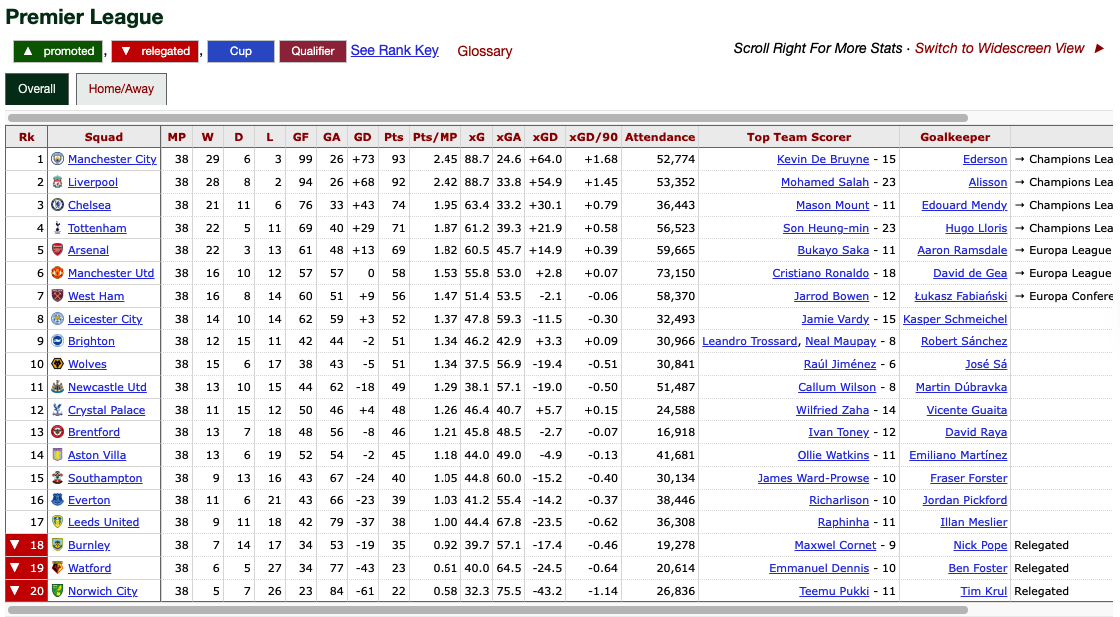

We can see that, in the same link, there is a table with information about each squad. We want to dig deeper and have access to more specific information about each squad. For example, if we click into the Manchester City squad, we can see more in-depth information:

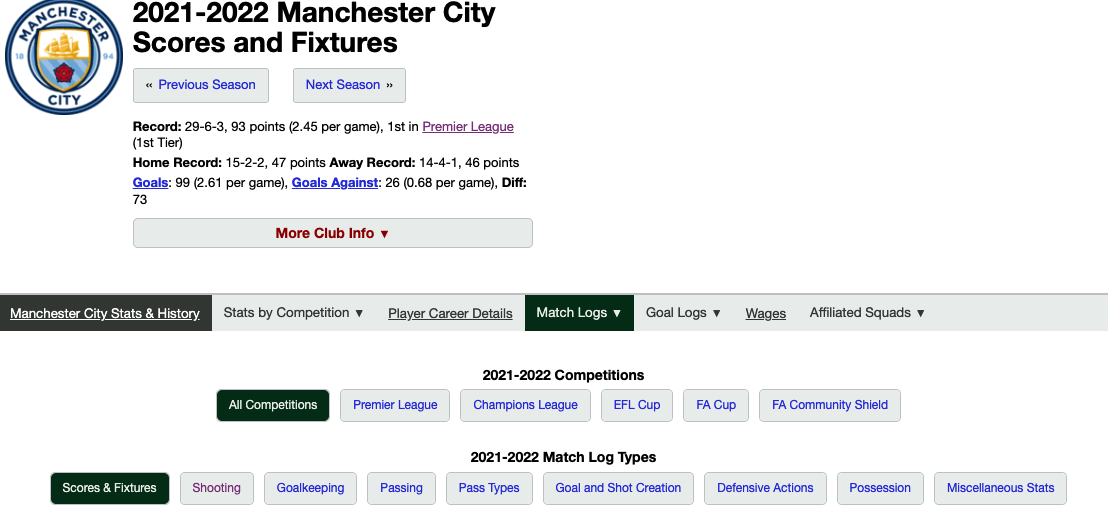

This is what we want! Thus, in the `standings_url` page, all we need to collect is the URL for each of the squad pages. How can we do that? If we inspect the page, we can see that we can find the href for each squad by looking for the anchor at each squad:

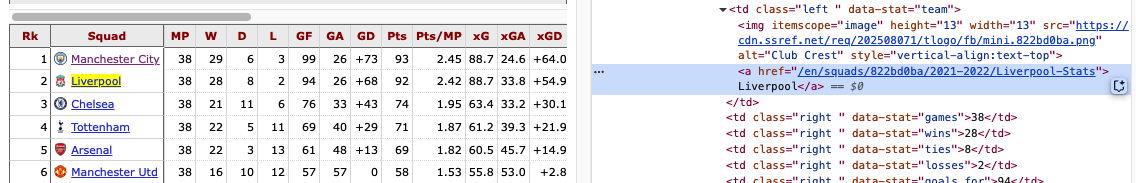

This element `<a href="/en/squads/822bd0ba/2021-2022/Liverpool-Stats">Liverpool</a>`, for example, is the redirecting link we are looking for for the Liverpool squad! Thus we want to collect this href property from the anchors so we can collect the urls. So let's do this as our next step!

---

### Parsing HTML links with Beautiful Soup
In order to do what was explained above, we will need the library called Beautiful Soup.

In [4]:
from bs4 import BeautifulSoup, Comment

In [5]:
soup = BeautifulSoup(data.text)
standings_table = soup.select('table.stats_table')[0]

We basically removed all the HTML info that we do not need and kept only the table content that we will actually use. Now, we need to find all of the a tags in the table.

In [6]:
links = standings_table.find_all('a')

# Now we want to get the href of each link.
links = [l.get("href") for l in links]
links = [l for l in links if '/squad'] # Since we have seen that the link to the squad's stats have /squad, we can get rid of the href links that do not relate to the squads.
links

['/en/squads/b8fd03ef/2021-2022/Manchester-City-Stats',
 '/en/players/e46012d4/Kevin-De-Bruyne',
 '/en/players/3bb7b8b4/Ederson',
 '/en/squads/822bd0ba/2021-2022/Liverpool-Stats',
 '/en/players/e342ad68/Mohamed-Salah',
 '/en/players/7a2e46a8/Alisson',
 '/en/squads/cff3d9bb/2021-2022/Chelsea-Stats',
 '/en/players/9674002f/Mason-Mount',
 '/en/players/33887998/Edouard-Mendy',
 '/en/squads/361ca564/2021-2022/Tottenham-Hotspur-Stats',
 '/en/players/92e7e919/Son-Heung-min',
 '/en/players/8f62b6ee/Hugo-Lloris',
 '/en/squads/18bb7c10/2021-2022/Arsenal-Stats',
 '/en/players/bc7dc64d/Bukayo-Saka',
 '/en/players/466fb2c5/Aaron-Ramsdale',
 '/en/squads/19538871/2021-2022/Manchester-United-Stats',
 '/en/players/dea698d9/Cristiano-Ronaldo',
 '/en/players/7ba6d84e/David-de-Gea',
 '/en/squads/7c21e445/2021-2022/West-Ham-United-Stats',
 '/en/players/79c84d1c/Jarrod-Bowen',
 '/en/players/9328b835/Lukasz-Fabianski',
 '/en/squads/a2d435b3/2021-2022/Leicester-City-Stats',
 '/en/players/45963054/Jamie-Vardy'

Now we can see that we have squad links to each individual squad! Now, we can see that the links only have the end of the link, so we need to reconstruct the beginning to turn into full URLs.

In [7]:
team_urls = [f"https://fbref.com{l}" for l in links] # Make the full url link.
team_urls

['https://fbref.com/en/squads/b8fd03ef/2021-2022/Manchester-City-Stats',
 'https://fbref.com/en/players/e46012d4/Kevin-De-Bruyne',
 'https://fbref.com/en/players/3bb7b8b4/Ederson',
 'https://fbref.com/en/squads/822bd0ba/2021-2022/Liverpool-Stats',
 'https://fbref.com/en/players/e342ad68/Mohamed-Salah',
 'https://fbref.com/en/players/7a2e46a8/Alisson',
 'https://fbref.com/en/squads/cff3d9bb/2021-2022/Chelsea-Stats',
 'https://fbref.com/en/players/9674002f/Mason-Mount',
 'https://fbref.com/en/players/33887998/Edouard-Mendy',
 'https://fbref.com/en/squads/361ca564/2021-2022/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/players/92e7e919/Son-Heung-min',
 'https://fbref.com/en/players/8f62b6ee/Hugo-Lloris',
 'https://fbref.com/en/squads/18bb7c10/2021-2022/Arsenal-Stats',
 'https://fbref.com/en/players/bc7dc64d/Bukayo-Saka',
 'https://fbref.com/en/players/466fb2c5/Aaron-Ramsdale',
 'https://fbref.com/en/squads/19538871/2021-2022/Manchester-United-Stats',
 'https://fbref.com/en/players/dea6

Now we have it good to go!
---
### Extracting Match Stats through Pandas and Requests
With the `team_urls` variable loaded, we can start to saving the info we want to extract and have it ready in our Pandas data frame!

In [8]:
# Let's start by getting the info of the first team, which is Manchester City
man_city = team_urls[0]
data = requests.get(man_city)
data.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202508071" />\n<script>\n/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */\n  window.dataLayer = window.dataLayer ||[];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'consent\',\'default\',{\n        \'ad_storage\':\'denied\',\n        \'analytics_storage\':\'denied\',\n        \'ad_user_data\':\'denied\',\n        \'ad_personalization\':\'denied\',\n        \'personalization_storage\':\'denied\',\n        \'functionality_storage\':\'granted\',\n        \'security_storage\':\'granted\',\n        \'wait_for_update\': 500\n      });\n      gtag("set", "ads_data_redaction", true);\

Since `man_city` now is a link, when we set `data` to get the info from `man_city`, we get the same veeeery long HTML page as we did in the beginning. Therefore, let's take a look at the link and analyze what we want to extract:

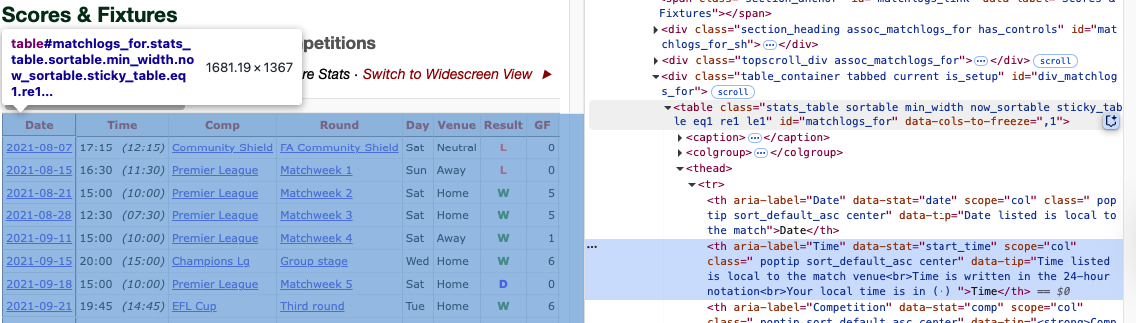

What we are interested in this page is the Scores & Fixtures table, which we can see that the table class is also stats_table (same class as the one we extracted the anchor links). We can also see that each row is one match. Thus, we want to grab the entire table and turn it into a Pandas Data Frame.

In [9]:
import pandas as pd
from io import StringIO

matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures") # It will read the HTML content and look for the match string.
matches # Will show up as a list!

[          Date   Time              Comp                Round  Day    Venue  \
 0   2021-08-07  17:15  Community Shield  FA Community Shield  Sat  Neutral   
 1   2021-08-15  16:30    Premier League          Matchweek 1  Sun     Away   
 2   2021-08-21  15:00    Premier League          Matchweek 2  Sat     Home   
 3   2021-08-28  12:30    Premier League          Matchweek 3  Sat     Home   
 4   2021-09-11  15:00    Premier League          Matchweek 4  Sat     Away   
 5   2021-09-15  20:00      Champions Lg          Group stage  Wed     Home   
 6   2021-09-18  15:00    Premier League          Matchweek 5  Sat     Home   
 7   2021-09-21  19:45           EFL Cup          Third round  Tue     Home   
 8   2021-09-25  12:30    Premier League          Matchweek 6  Sat     Away   
 9   2021-09-28  21:00      Champions Lg          Group stage  Tue     Away   
 10  2021-10-03  16:30    Premier League          Matchweek 7  Sun     Away   
 11  2021-10-16  15:00    Premier League          Ma

In [10]:
matches[0] # The Data Frame is located at index 0.

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,NaN,NaN,57,NaN,Fernandinho,4-3-3,4-2-3-1,Paul Tierney,Match Report,NaN
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,1.8,1.0,65,58262.0,Fernandinho,4-3-3,4-3-3,Anthony Taylor,Match Report,NaN
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,2.6,0.1,67,51437.0,İlkay Gündoğan,4-3-3,4-3-3,Graham Scott,Match Report,NaN
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,4.4,0.2,80,52276.0,İlkay Gündoğan,4-3-3,5-4-1,Martin Atkinson,Match Report,NaN
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,2.8,0.6,61,32087.0,İlkay Gündoğan,4-3-3,4-2-3-1,Paul Tierney,Match Report,NaN
5,2021-09-15,20:00,Champions Lg,Group stage,Wed,Home,W,6,3,de RB Leipzig,1.9,0.9,50,38062.0,Rúben Dias,4-3-3,4-2-3-1,Serdar Gözübüyük,Match Report,NaN
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,1.0,0.4,64,52698.0,Fernandinho,4-3-3,4-4-2,Jonathan Moss,Match Report,NaN
7,2021-09-21,19:45,EFL Cup,Third round,Tue,Home,W,6,1,Wycombe,NaN,NaN,79,30959.0,Kevin De Bruyne,4-3-3,3-1-4-2,Robert Jones,Match Report,NaN
8,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Away,W,1,0,Chelsea,1.7,0.2,59,40036.0,Rúben Dias,4-3-3,3-5-2,Michael Oliver,Match Report,NaN
9,2021-09-28,21:00,Champions Lg,Group stage,Tue,Away,L,0,2,fr Paris S-G,1.9,0.4,54,37350.0,Rúben Dias,4-3-3,4-3-3,Carlos del Cerro,Match Report,NaN


We now have our table extracted to a data frame so that we can do the ML predictions!
---
### Extracting Match Shooting Stats
We have extracted the "Scores & Fixtures table", but we have another table that would give us additional great information about the matches: the Shooting stats! If you watch soccer... you know this is important!

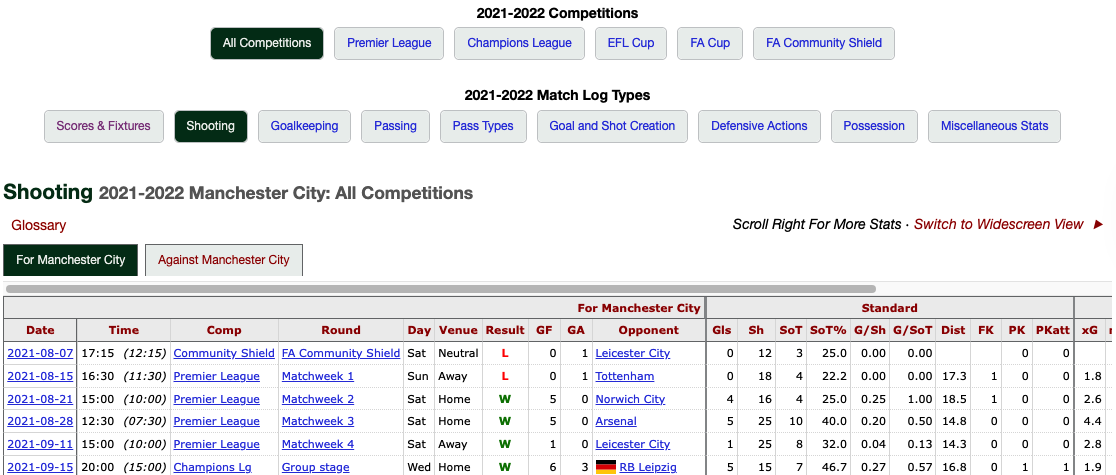

Here, we can see that there is a table for that! Thus we want to also extract the info from that table. We can do a similar process by finding the a tag and have the link for the shooting stats.

In [11]:
soup = BeautifulSoup(data.text)
links = soup.find_all('a') # Find all the anchors in the page
links = [l.get('href') for l in links] # Gets all the links
links = [l for l in links if l and 'all_comps/shooting' in l]
links

['/en/squads/b8fd03ef/2021-2022/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2021-2022/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2021-2022/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions',
 '/en/squads/b8fd03ef/2021-2022/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions']

In [12]:
# Now that we have the link to the shooting table, we can grab the html for this specific link!
data = requests.get(f"https://fbref.com{links[0]}")
data.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202508071" />\n<script>\n/* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */\n  window.dataLayer = window.dataLayer ||[];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'consent\',\'default\',{\n        \'ad_storage\':\'denied\',\n        \'analytics_storage\':\'denied\',\n        \'ad_user_data\':\'denied\',\n        \'ad_personalization\':\'denied\',\n        \'personalization_storage\':\'denied\',\n        \'functionality_storage\':\'granted\',\n        \'security_storage\':\'granted\',\n        \'wait_for_update\': 500\n      });\n      gtag("set", "ads_data_redaction", true);\

Here we are again! Back to that very long HTML text, but now we can extract the info from the Shooting table!

In [13]:
shooting = pd.read_html(data.text, match="Shooting")[0] # Collect the Data Frame of the table.
shooting

/var/folders/w5/g99h6qkn7ql5sfytpj6dtmjm0000gn/T/ipykernel_88303/2563485898.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0] # Collect the Data Frame of the table.


For Manchester City                                                     \
                  Date   Time              Comp                Round  Day   
0           2021-08-07  17:15  Community Shield  FA Community Shield  Sat   
1           2021-08-15  16:30    Premier League          Matchweek 1  Sun   
2           2021-08-21  15:00    Premier League          Matchweek 2  Sat   
3           2021-08-28  12:30    Premier League          Matchweek 3  Sat   
4           2021-09-11  15:00    Premier League          Matchweek 4  Sat   
5           2021-09-15  20:00      Champions Lg          Group stage  Wed   
6           2021-09-18  15:00    Premier League          Matchweek 5  Sat   
7           2021-09-21  19:45           EFL Cup          Third round  Tue   
8           2021-09-25  12:30    Premier League          Matchweek 6  Sat   
9           2021-09-28  21:00      Champions Lg          Group stage  Tue   
10          2021-10-03  16:30    Premier League          Matchweek 7  Sun   
11          2021-10-16  15:00    Premier League          Matchweek 8  Sat   
12          2021-10-19  18:45      Champions Lg          Group stage  Tue   
13          2021-10-23  17:30    Premier League          Matchweek 9  Sat   
14          2021-10-27  19:45           EFL Cup         Fourth round  Wed   
15          2021-10-30  15:00    Premier League         Matchweek 10  Sat   
16          2021-11-03  20:00      Champions Lg          Group stage  Wed   
17          2021-11-06  12:30    Premier League         Matchweek 11  Sat   
18          2021-11-21  14:00    Premier League         Matchweek 12  Sun   
19          2021-11-24  20:00      Champions Lg          Group stage  Wed   
20          2021-11-28  14:00    Premier League         Matchweek 13  Sun   
21          2021-12-01  20:15    Premier League         Matchweek 14  Wed   
22          2021-12-04  17:30    Premier League         Matchweek 15  Sat   
23          2021-12-07  18:45      Champions Lg          Group stage  Tue   
24          2021-12-11  12:30    Premier League         Matchweek 16  Sat   
25          2021-12-14  20:00    Premier League         Matchweek 17  Tue   
26          2021-12-19  14:15    Premier League         Matchweek 18  Sun   
27          2021-12-26  15:00    Premier League         Matchweek 19  Sun   
28          2021-12-29  20:15    Premier League         Matchweek 20  Wed   
29          2022-01-01  12:30    Premier League         Matchweek 21  Sat   
30          2022-01-07  20:00            FA Cup   Third round proper  Fri   
31          2022-01-15  12:30    Premier League         Matchweek 22  Sat   
32          2022-01-22  17:30    Premier League         Matchweek 23  Sat   
33          2022-02-05  15:00            FA Cup  Fourth round proper  Sat   
34          2022-02-09  19:45    Premier League         Matchweek 24  Wed   
35          2022-02-12  17:30    Premier League         Matchweek 25  Sat   
36          2022-02-15  20:00      Champions Lg          Round of 16  Tue   
37          2022-02-19  17:30    Premier League         Matchweek 26  Sat   
38          2022-02-26  17:30    Premier League         Matchweek 27  Sat   
39          2022-03-01  19:15            FA Cup   Fifth round proper  Tue   
40          2022-03-06  16:30    Premier League         Matchweek 28  Sun   
41          2022-03-09  20:00      Champions Lg          Round of 16  Wed   
42          2022-03-14  20:00    Premier League         Matchweek 29  Mon   
43          2022-03-20  15:00            FA Cup       Quarter-finals  Sun   
44          2022-04-02  15:00    Premier League         Matchweek 31  Sat   
45          2022-04-05  20:00      Champions Lg       Quarter-finals  Tue   
46          2022-04-10  16:30    Premier League         Matchweek 32  Sun   
47          2022-04-13  21:00      Champions Lg       Quarter-finals  Wed   
48          2022-04-16  15:30            FA Cup          Semi-finals  Sat   
49          2022-04-20  20:00    Premier League         Matchweek 30  Wed   

---
### Cleaning and Merging the Data
We have now both the Scores & Fixtures data, as well as the Shooting data! What should we do next? Combine them! Let's do it.

In [14]:
shooting.head() # Let's take a look at the beginning of the table.

For Manchester City                                                     \
                 Date   Time              Comp                Round  Day   
0          2021-08-07  17:15  Community Shield  FA Community Shield  Sat   
1          2021-08-15  16:30    Premier League          Matchweek 1  Sun   
2          2021-08-21  15:00    Premier League          Matchweek 2  Sat   
3          2021-08-28  12:30    Premier League          Matchweek 3  Sat   
4          2021-09-11  15:00    Premier League          Matchweek 4  Sat   

                                         ... Standard               Expected  \
     Venue Result GF GA        Opponent  ...     Dist   FK PK PKatt       xG   
0  Neutral      L  0  1  Leicester City  ...      NaN  NaN  0     0      NaN   
1     Away      L  0  1       Tottenham  ...     17.3  1.0  0     0      1.8   
2     Home      W  5  0    Norwich City  ...     18.5  1.0  0     0      2.6   
3     Home      W  5  0         Arsenal  ...     14.8  0.0  0     0      4.4   
4     Away      W  1  0  Leicester City  ...     14.3  0.0  0     0      2.8   

                            Unnamed: 25_level_0  
  npxG npxG/Sh G-xG np:G-xG        Match Report  
0  NaN     NaN  NaN     NaN        Match Report  
1  1.8    0.10 -1.8    -1.8        Match Report  
2  2.6    0.17  1.4     1.4        Match Report  
3  4.4    0.18  0.6     0.6        Match Report  
4  2.8    0.12 -1.8    -1.8        Match Report  

[5 rows x 26 columns]

In [15]:
# We have a case of multi-index, which will just make things more complicated if we don't change that right now (i.e. we do not need the first row written in bold)
shooting.columns = shooting.columns.droplevel() # Drops the top index level
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,17.3,1.0,0,0,1.8,1.8,0.10,-1.8,-1.8,Match Report
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,18.5,1.0,0,0,2.6,2.6,0.17,1.4,1.4,Match Report
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,14.8,0.0,0,0,4.4,4.4,0.18,0.6,0.6,Match Report
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,14.3,0.0,0,0,2.8,2.8,0.12,-1.8,-1.8,Match Report


In [16]:
# Good! Now we can play with the Data Frame.

# We have the matches Data Frame and the shooting Data Frame. We will combine them since they refer to the same matches but have different stats.
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date") # We pick the info we want to merge based on the Date column and let the method do the rest.
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,...,4-2-3-1,Paul Tierney,Match Report,NaN,12,3,NaN,NaN,0,0
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,4-3-3,Anthony Taylor,Match Report,NaN,18,4,17.3,1.0,0,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,4-3-3,Graham Scott,Match Report,NaN,16,4,18.5,1.0,0,0
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,5-4-1,Martin Atkinson,Match Report,NaN,25,10,14.8,0.0,0,0
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,4-2-3-1,Paul Tierney,Match Report,NaN,25,8,14.3,0.0,0,0


See how easy? We have now combined the two tables. We basically took the matches data frame and added more columns with info from the shooting data frame.

---
### Generalizing this idea for multiple seasons and teams
There has been done a lot of work so far... but only for one season and one team. We will now make things more general so that we can collect the info for all of the teams throughout a given period of time (i.e. # of seasons)

In [29]:
years = list(range(2022, 2020, -1)) # This will start with the current season and go back to previous seasons (i.e. 20-21 and 21-22 seasons)
years

[2022, 2021]

In [30]:
all_matches = [] # This will contain several data frames, each containing the match logs for one team in one season. We will later combine once the loop is finished!
standings_url = "https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats" # Initial used URL.

In [ ]:
import time

for year in years:
    data = requests.get(standings_url) # Get the HTML content
    soup = BeautifulSoup(data.text) # Parse the HTML 
    standings_table = soup.select('table.stats_table')[0] # Looks for table that contains all the squads' links to get to the individual tables
    
    links = [l.get("href") for l in standings_table.find_all('a')] # Finds all of the squads' links
    links = [l for l in links if '/squads/' in l] # Filter links
    team_urls = [f"https://fbref.com{l}" for l in links] # Turn into full URLs

    # Once we are done with scraping the data from a given season, we need to go to the previous one.
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com/{previous_season}"

    for team_url in team_urls: # Iterate over each team's links
        team_name = team_url.split("/")[-1].replace("-Stats","").replace("-"," ") # Gets the full name of the team, and removes unnecessary stuff to the name

        data = requests.get(team_url) # Gets the HTML content
        matches = pd.read_html(StringIO(data.text), match="Scores & Fixtures")[0]

        soup = BeautifulSoup(data.text) # Parses the HTML
        links = [l.get("href") for l in soup.find_all('a')] # Finds all the links
        links = [l for l in links if l and 'all_comps/shooting/' in l] # Filters the links
        data = requests.get(f"https://fbref.com{links[0]}") # Gets the full URL
        shooting = pd.read_html(StringIO(data.text), match="Shooting")[0] # Gets the Shooting Data Frame
        shooting.columns = shooting.columns.droplevel() # Eliminates the multi-level index

        try: # Sometimes the teams do not have Shooting stats.
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue

        team_data = team_data[team_data["Comp"] == "Premier League"] # Filters to be only PL games
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(10) # Slows down how fast we scrape so we don't get blocked while scraping.

In [ ]:
# Now we need to combine all the individual Data Frames into one
match_df = pd.concat(all_matches) # Concatenates the list of DF and turns into one
match_df.columns = [c.lower() for c in match_df.columns] # Make all the columns lower case for simplicity when using it in our ML model.
match_df.to_csv("matches.csv") # Saves the data to a CSV file.

In [28]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18.0,4.0,17.3,1.0,0,0,2022,ManchesterCity
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16.0,4.0,18.5,1.0,0,0,2022,ManchesterCity
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25.0,10.0,14.8,0.0,0,0,2022,ManchesterCity
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25.0,8.0,14.3,0.0,0,0,2022,ManchesterCity
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16.0,1.0,16.4,1.0,0,0,2022,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0,4,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0,0,2021,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1,2,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0,0,2021,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0,5,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0,0,2021,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1,1,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0,0,2021,Huddersfield Town


Here we go! The data scraping is done! Now we can use the data for constructing our ML Model to predict which team is going to win a given match.